# Reference tracking NMPC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openmpc.mpc import MPCProblem, SetPointTrackingMPC
from openmpc.models  import  LinearSystem


In [2]:

# Define the discrete-time aircraft system
A = np.array([[0.9719, 0.0155], [0.2097, 0.9705]])
B = np.array([[0.0071], [0.3263]])
C = np.array([[1., 0.]])  # Output matrix to pick only the first state (alpha)
D = np.zeros((1, 1))

# Create the state-space system (discrete-time)
sys_disc = LinearSystem(A, B, C, D)

# Define the cost matrices
Q = np.array([[10., 0.], [0., 1.]])  # State penalty
R = np.array([[1.]])  # Input penalty
T = 10  # Prediction horizon

# Sampling time
sampling_time = 1 / 60  # 1/60 seconds

# Create the MPC parameters object
mpc_params = MPCProblem(system  = sys_disc, 
                        horizon = T, 
                        Q       = Q, 
                        R       = R, 
                        QT      = 100*np.eye(2))

# Add general state constraints for alpha and q: -15 <= alpha <= 30 and -100 <= q <= 100
Ax = np.array([
    [1., 0.],   # alpha <= 30
    [-1., 0.],  # alpha >= -15
    [0., 1.],   # q <= 100
    [0., -1.]   # q >= -100
])
bx = np.array([30., 15., 100., 100.])
mpc_params.add_general_state_constraints(Ax, bx)

# Add input constraints: -25 <= delta <= 25
mpc_params.add_input_magnitude_constraint(limit=25)

# Soften the reference tracking constraint
mpc_params.soften_tracking_constraint(penalty_weight=10000)

# Add dual mode with an infinite-horizon LQR controller
L = sys_disc.get_lqr_controller(Q, R)  # Compute the infinite-horizon LQR controller
mpc_params.add_dual_mode(horizon=20, controller=L)

# Create the tracking MPC object
mpc_tracking = SetPointTrackingMPC(mpc_params)


# Run the simulation
T_sim_seconds = 8  # Total simulation time in seconds
T_sim         = int(T_sim_seconds / sampling_time)  # Total simulation time in controller iterations
x0            = np.array([0, 0])  # Initial state

# Reference changes specified in absolute time (in seconds)
reference_values = [(0., 0.), (2., 15.0), (4., -20.0), (6., 0.)]  # Time (s) and reference pairs
reference_array = np.zeros(T_sim)  # Array to store the reference values (only alpha)
x_sim = np.zeros((2, T_sim + 1))
u_sim = np.zeros(T_sim)
x_sim[:, 0] = x0


In [ ]:

# Simulation loop
for t in range(T_sim):
    current_state = x_sim[:, t]
    

    # Convert absolute time to simulation iterations
    current_time = t * sampling_time
    # Determine the current reference value based on the absolute time
    for time_sec, ref_value in reference_values:
        if current_time >= time_sec:
            current_reference = ref_value
    reference = np.array([current_reference])  # Tracking reference for alpha only

    # Store the current reference
    reference_array[t] = current_reference

    # Get the control action
    u_t      = mpc_tracking.get_control_action(current_state, reference)
    u_sim[t] = u_t
    x_sim[:, t + 1] = A @ current_state + B @ u_t


Time: 0.00 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.02 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.03 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.05 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.07 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.08 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.10 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.12 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.13 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0

/tmp/ipykernel_149925/1256479257.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_sim[t] = u_t


stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.77 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.78 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.80 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.82 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.83 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.85 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.87 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.88 s, State: [0. 0.], Reference: [0.]
reference from inside
[0.]
stats
[0. 0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Time: 0.90 s, State: [0. 0.], Reference: [0.]
reference from insi

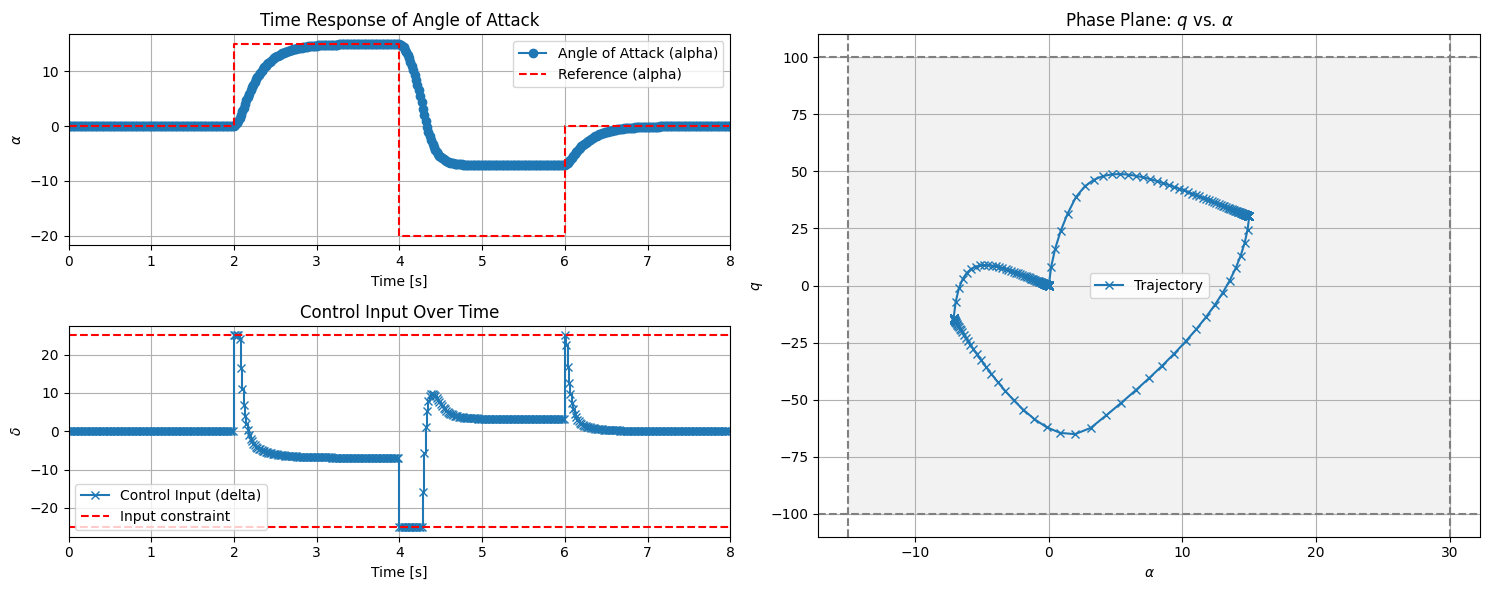

In [4]:

# Plotting the simulation results
time = np.arange(T_sim + 1) * sampling_time  # Time vector in seconds for states
time_u = np.arange(T_sim) * sampling_time  # Time vector in seconds for control input

plt.figure(figsize=(15, 6))

# Plot alpha over time
plt.subplot(2, 2, 1)
plt.plot(time, x_sim[0, :], label='Angle of Attack (alpha)', marker='o')
plt.step(time_u, reference_array, where='post', linestyle='--', color='r', label='Reference (alpha)')
plt.xlabel('Time [s]')
plt.ylabel(r'$\alpha$')
plt.title('Time Response of Angle of Attack')
plt.legend()
plt.grid()
plt.xlim([0, T_sim_seconds])

# Plot control input delta over time
plt.subplot(2, 2, 3)
plt.step(time_u, u_sim, where='post', label='Control Input (delta)', marker='x')
plt.axhline(25, color='r', linestyle='--', label='Input constraint')
plt.axhline(-25, color='r', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel(r'$\delta$')
plt.title('Control Input Over Time')
plt.legend()
plt.grid()
plt.xlim([0, T_sim_seconds])

# Plot phase plane (alpha vs. q)
plt.subplot(1, 2, 2)
plt.plot(x_sim[0, :], x_sim[1, :], marker='x', label='Trajectory')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$q$')
plt.title('Phase Plane: $q$ vs. $\\alpha$')
# Add state constraints as shaded region
plt.axhline(100, color='gray', linestyle='--')
plt.axhline(-100, color='gray', linestyle='--')
plt.axvline(30, color='gray', linestyle='--')
plt.axvline(-15, color='gray', linestyle='--')
plt.fill_betweenx(np.linspace(-100, 100, 100), -15, 30, color='gray', alpha=0.1)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
